In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lemonade.csv')

# Acquiring Data:

In [3]:
df.sample(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
131,5/12/17,Friday,66.7,0.67,40,0.5,29
253,9/11/17,Monday,68.4,0.69,38,0.5,28
129,5/10/17,Wednesday,69.4,0.69,40,0.5,28


# Visualization:

<AxesSubplot:xlabel='Date', ylabel='Sales'>

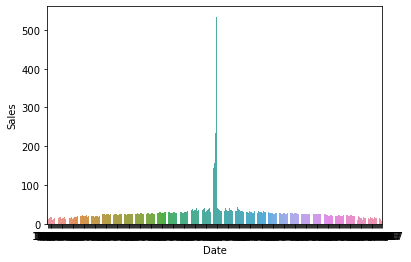

In [4]:
#Plotting Sales by Date:
sns.barplot(data=df, x = 'Date', y = 'Sales')

It appears that there is clearly some kind of anomaly toward the middle of the year.

<AxesSubplot:xlabel='Temperature', ylabel='Sales'>

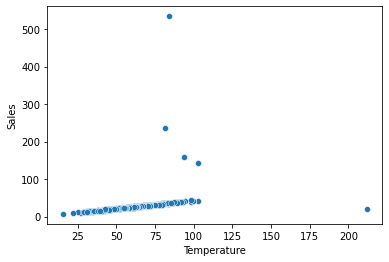

In [5]:
#Plotting Sales as a function of temperature:
sns.scatterplot(data = df, x = 'Temperature', y = 'Sales')

There are definitely anomalies in terms of temperature, too. One day shows a temperature of 225 degrees?

<AxesSubplot:xlabel='Date', ylabel='Temperature'>

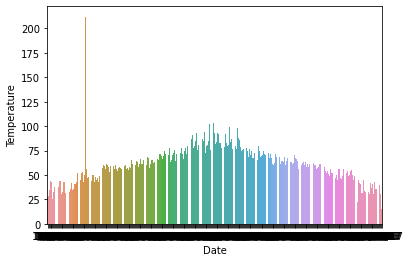

In [6]:
#Plotting Temperature with Date:
sns.barplot(data = df, x = 'Date', y = 'Temperature')

The anomalous temperature reading can be seen here again, and it appears that it occurs sometime early in the year, when temperatures are lower on average. 

# Exercises:

#### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [12]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    # Defining values for quantiles:
    qnt1 = df.quantile(.25)
    qnt3 = df.quantile(.75)
    #Calculating the IQR:
    iqr = qnt3 - qnt1
    #Defining the lower and upper bounds:
    upper = qnt3 + (iqr * multiplier)
    lower = qnt1 - (iqr * multiplier)
    return upper, lower

## 1. Using lemonade.csv dataset and focusing on continuous variables:

#### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [28]:
cols = df.columns.to_list()
cols

['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [22]:
#Creating empty DataFrame to store upper and lower bound values:
lower_bounds = pd.DataFrame()
#Creating list of original columns that I can iterate through:
for i in cols:
    #Iterating through the columns to get the upper and lower bound for each:
    lo_bnd = get_lower_and_upper_bounds(i)
    #Adding values to dataframe for each column of the original dataframe:
    lower_bounds['low_bound'] = lo_bnd[1]

#Transposing output dataframe to make accessing bound values easier:
lower_bounds = lower_bounds
lower_bounds

,low_bound
Temperature,16.70
Rainfall,0.26
Flyers,4.00
Price,0.50
Sales,5.00


In [34]:
#Creating empty DataFrame to store upper and lower bound values:
lower_bounds = pd.DataFrame()
#Creating list of original columns that I can iterate through:
for i in cols:
    #Iterating through the columns to get the upper and lower bound for each:
    lo_bnd = get_lower_and_upper_bounds(i)
    #Adding values to dataframe for each column of the original dataframe:
    lower_bounds['low_bound'] = lo_bnd[1]

#Transposing output dataframe to make accessing bound values easier:
lower_bounds = lower_bounds.T 
lower_bounds

,Temperature,Rainfall,Flyers,Price,Sales
low_bound,16.7,0.26,4.0,0.5,5.0


In [24]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [41]:
temp_lower = lower_bounds.Temperature[0]
df[df.Temperature < temp_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [39]:
type(lower_bounds.Temperature[0])

numpy.float64

In [35]:
lower_bounds

,Temperature,Rainfall,Flyers,Price,Sales
low_bound,16.7,0.26,4.0,0.5,5.0
